In [57]:
import pandas as pd
import matplotlib.pyplot as plt

class ROC():
    def __init__(self, Probs, TrueClass):
        self.Probs = Probs
        self.TrueClass = TrueClass
    
    def compute_ROC_coordinates(self):
        df =  pd.merge(self.Probs, self.TrueClass, left_index=True, right_index=True, how='outer')
        df.columns = ['Probs','TrueClass']
        df = df.sort_values(by='Probs', ascending= False)
        FP = 0
        TP = 0
        ROC_coordinates = []
        Previous_Prob = float("-inf")
        P = df[df['Probs'] > 0.5].count()['Probs']
        N = len(self.Probs) - P
        print(P)
        for i in range(1, P+N):
            if(df['Probs'][i] != Previous_Prob):
                ROC_coordinates.append((FP/N, TP/P))
                Previous_Prob = df['Probs'][i]
            if(df['TrueClass'][i] == 1):
                TP += 1
            else:
                FP += 1
        ROC_coordinates.append((FP/N, TP/P))
        return ROC_coordinates

    def plot_ROC(self, ROC_coordinates):
        plt.figure()
        lw = 2
        fpr = []
        tpr = []
        for each in ROC_coordinates:
            fpr.append(each[0])
            tpr.append(each[1])
        plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
        plt.show()

2
[(0.0, 0.0), (0.0, 0.5), (0.5, 0.5), (0.5, 1.0)]


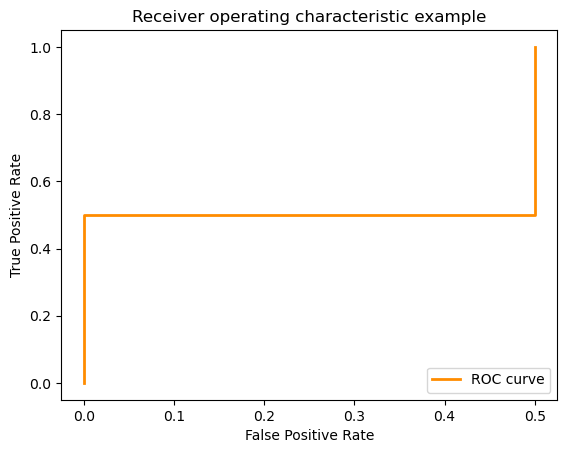

In [58]:
Probs = pd.DataFrame({'Probs': [0.1, 0.9, 0.2,0.8]})
TrueClass = pd.DataFrame({'TrueClass': [1,1,0,1]})
r = ROC(Probs, TrueClass)
roc = r.compute_ROC_coordinates()
print(roc)
r.plot_ROC(roc)